In [ ]:
import torch
print(torch.cuda.is_available())

True


# Import Library

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import k_hop_subgraph, to_networkx
from torch_geometric.nn import MessagePassing
from torch_geometric.nn.norm import BatchNorm
from torch_geometric.data import Data

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

# Load Cora Dataset

In [3]:
dataset = Planetoid(root="data/Cora", name="Cora")
data = dataset[0]

In [4]:
data.num_nodes

2708

In [5]:
data.num_edges

10556

In [6]:
data.num_features

1433

In [7]:
dataset.num_classes

7

In [8]:
# ================================
# PERSON 1 JOB (SAMPLING SUBGRAPH)
# ================================

# pick a random node as "node of interest"
node_of_interest = random.randint(0, data.num_nodes - 1)
print("Node of Interest:", node_of_interest)

# extract 2-hop subgraph
subset_nodes, sub_edge_index, _, _ = k_hop_subgraph(
    node_of_interest, 
    num_hops=2, 
    edge_index=data.edge_index, 
    relabel_nodes=True
)

sub_x = data.x[subset_nodes]
sub_y = data.y[subset_nodes]

print("Subgraph Nodes:", sub_x.size(0))


Node of Interest: 1107
Subgraph Nodes: 85


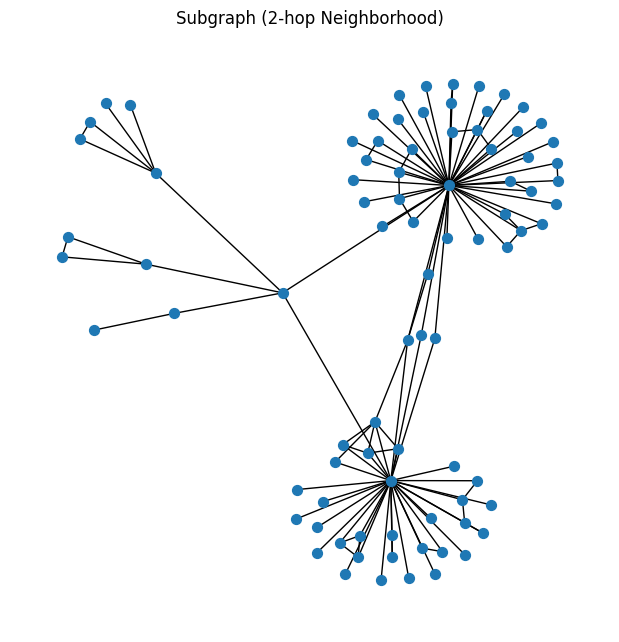

In [9]:
# ================================
# PERSON 1 JOB (VISUALIZATION)
# ================================

G = to_networkx(
    Data(x=sub_x, edge_index=sub_edge_index), 
    to_undirected=True
)

plt.figure(figsize=(6,6))
nx.draw(G, node_size=50)
plt.title("Subgraph (2-hop Neighborhood)")
plt.show()


# Sampling Node of Interest + Subgraph

In [8]:
# Set random seed agar reproducible
random.seed(42)
torch.manual_seed(42)

# Tentukan jumlah node of interest
num_seed_nodes = 50

# Sampling node secara acak
seed_nodes = random.sample(range(data.num_nodes), num_seed_nodes)

print("Jumlah seed node:", len(seed_nodes))
print("Contoh seed node:", seed_nodes[:10])

# Tentukan jumlah hop (2–3)
num_hops = 2

# Bangun subgraph dari node sampling
subset_nodes, sub_edge_index, _, _ = k_hop_subgraph(
    node_idx=seed_nodes,
    num_hops=num_hops,
    edge_index=data.edge_index,
    relabel_nodes=True
)

print("Jumlah node subgraph:", subset_nodes.size(0))
print("Jumlah edge subgraph:", sub_edge_index.size(1))

subgraph_data = Data(
    x=data.x[subset_nodes],
    edge_index=sub_edge_index,
    y=data.y[subset_nodes]
)

print(subgraph_data)

subgraph_data.x = data.x[subset_nodes]

Jumlah seed node: 50
Contoh seed node: [2619, 456, 102, 1126, 1003, 914, 571, 419, 2233, 356]
Jumlah node subgraph: 842
Jumlah edge subgraph: 3224
Data(x=[842, 1433], edge_index=[2, 3224], y=[842])


Visualize Subgraph (NetworkX)

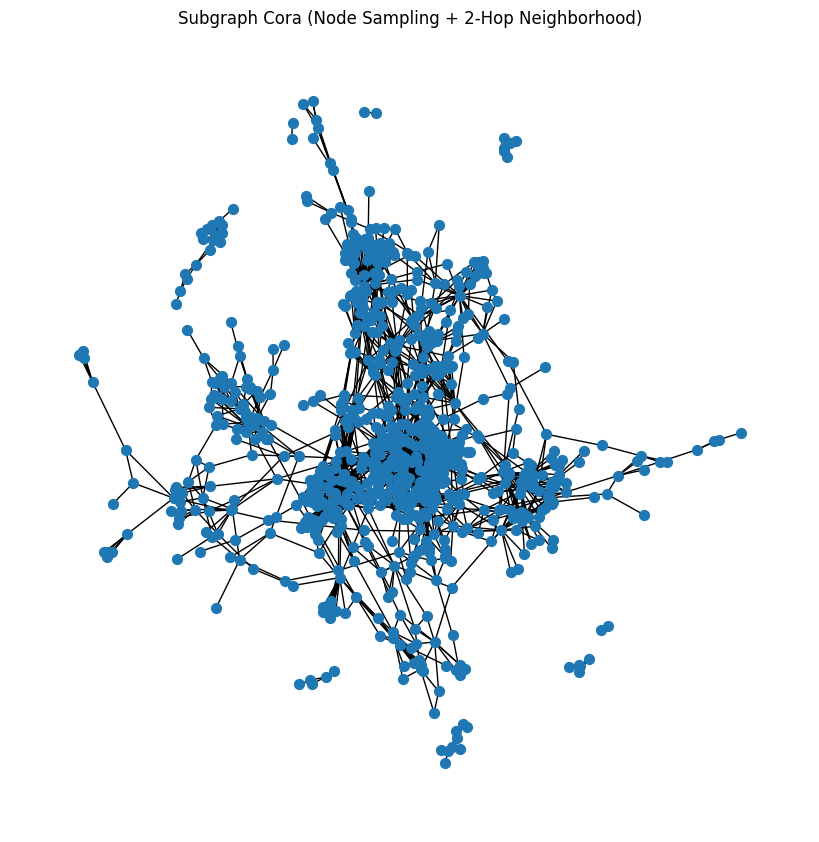

In [9]:
# Konversi subgraph ke NetworkX
G = to_networkx(subgraph_data, to_undirected=True)

plt.figure(figsize=(8, 8))
nx.draw(
    G,
    node_size=50,
    with_labels=False
)
plt.title("Subgraph Cora (Node Sampling + 2-Hop Neighborhood)")
plt.show()


# Message Passing Layer (Pre-process)

$h_u^{(k)} = \sum W_{\text{msg}} \cdot h_u^{(k-1)} + W_{\text{self}} \cdot h_v^{(k-1)}$

 di mana,
 1. **k** adalah urutan lapisan GNN.
 2. **Wmsg** adalah bobot yang diakses bersama dengan neighborhood nodes.
 3. **Wself** adalah bobot milik node asal (v).

# Intra-layer GNN Block

$$
\mathbf{h}_v^{(k)} =
\text{ACT}\!\left(
    \text{Dropout}\!\left(
        \text{BatchNorm}\!\left(
            \mathbf{W}^{(k-1)}\,\mathbf{h}_v^{(k-1)} + \mathbf{b}^{(k-1)}
        \right)
    \right)
\right)
+ \mathbf{h}_v^{(k-1)}
$$


di mana:

1. **ACT** adalah fungsi aktivasi yang Anda pilih.
2. **BatchNorm** adalah `1D-Batch Normalization`.


# Full Model with k>1 Layers

# Show Model Structure

# Training Setup

# Training Loop (with validation loss)

Training Curve Plot

# Demos?